In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1,1,1.0,0.0,0.0,0,2.0,2.0,...,0,0.0,0.0,0,0.0,0,0.0,0.0,2,0.0
1,1.0,1.0,2,0,0.0,0.0,NaN,0,3.0,0.0,...,0,0.0,0.0,0,0.0,2,2.0,2.0,0,7.0
2,2.0,2.0,1,0,0.0,0.0,3.0,0,2.0,NaN,...,0,0.0,0.0,2,0.0,3,3.0,2.0,0,7.0
3,2.0,2.0,2,1,0.0,0.0,NaN,0,2.0,2.0,...,0,0.0,0.0,2,0.0,2,2.0,2.0,0,7.0
4,2.0,2.0,1,0,0.0,0.0,NaN,0,2.0,0.0,...,0,0.0,0.0,3,0.0,2,2.0,2.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0,2,1.0,0.0,NaN,0,NaN,NaN,...,0,0.0,0.0,3,0.0,0,0.0,3.0,0,70.0
354,2.0,3.0,2,0,0.0,0.0,0.0,0,3.0,2.0,...,0,NaN,0.0,0,0.0,0,0.0,1.0,0,NaN
355,2.0,2.0,2,1,0.0,NaN,0.0,0,0.0,0.0,...,0,0.0,NaN,2,0.0,0,0.0,2.0,0,70.0
356,2.0,1.0,0,3,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0,0.0,0,0.0,1.0,0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
float64		column 2	18
int64		column 3	0
int64		column 4	0
float64		column 5	19
float64		column 6	19
float64		column 7	36
int64		column 8	0
float64		column 9	37
float64		column 10	18
float64		column 11	18
int64		column 12	0
float64		column 13	18
int64		column 14	0
float64		column 15	37
float64		column 16	19
float64		column 17	19
float64		column 18	18
int64		column 19	0
float64		column 20	18
float64		column 21	18
int64		column 22	0
float64		column 23	18
float64		column 24	36
int64		column 25	0
float64		column 26	54
float64		column 27	37
int64		column 28	0
float64		column 29	55
int64		column 30	0
float64		column 31	18
float64		column 32	18
int64		column 33	0
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,340.000000,340.000000,358.000000,358.000000,339.000000,339.000000,322.000000,358.000000,321.000000,340.000000,...,358.000000,304.000000,321.000000,358.000000,303.000000,358.000000,340.000000,340.000000,358.000000,340.000000
mean,2.076471,1.805882,1.569832,1.354749,0.610619,0.445428,0.145963,0.379888,0.629283,0.520588,...,0.399441,0.427632,0.442368,0.949721,0.448845,0.106145,0.123529,1.876471,0.558659,36.102941
std,0.651777,0.685260,0.900909,1.135062,0.898061,0.951082,0.524003,0.837388,0.988820,0.900436,...,0.856479,0.833316,0.947338,1.129060,0.950701,0.455180,0.506045,0.697259,1.107990,15.188433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

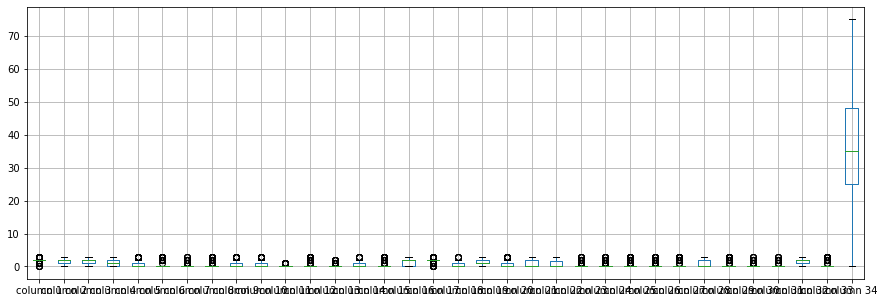

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.076471
column 2      1.805882
column 3      1.569832
column 4      1.354749
column 5      0.610619
column 6      0.445428
column 7      0.145963
column 8      0.379888
column 9      0.629283
column 10     0.520588
column 11     0.117647
column 12     0.410615
column 13     0.135294
column 14     0.547486
column 15     0.258567
column 16     1.383481
column 17     1.952802
column 18     0.491176
column 19     1.287709
column 20     0.620588
column 21     0.964706
column 22     0.642458
column 23     0.288235
column 24     0.329193
column 25     0.399441
column 26     0.427632
column 27     0.442368
column 28     0.949721
column 29     0.448845
column 30     0.106145
column 31     0.123529
column 32     1.876471
column 33     0.558659
column 34    36.102941
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.432879,0.232583,-0.047529,-0.042174,0.011415,-0.103422,-0.042263,0.127095,0.168226,...,-0.022510,0.146979,-0.003470,0.055070,-0.040796,0.024146,0.032482,0.122349,-0.030525,0.013580
column 2,0.432879,1.000000,0.351425,-0.070883,-0.004797,-0.077900,-0.093369,-0.106925,0.289041,0.297362,...,-0.103231,0.220990,-0.128936,0.004278,-0.130518,0.007555,-0.003792,0.034970,-0.152569,0.001850
column 3,0.232583,0.351425,1.000000,-0.058534,0.249124,0.332158,-0.200534,0.280341,0.275966,0.248108,...,0.285024,0.321884,0.284741,-0.252643,0.287047,-0.093264,-0.132772,0.132379,0.275099,0.155909
column 4,-0.047529,-0.070883,-0.058534,1.000000,0.283140,0.415293,-0.107577,0.361761,-0.302214,-0.180135,...,0.369593,-0.144342,0.355996,0.003028,0.355135,-0.176096,-0.189199,0.050797,0.389887,0.055621
column 5,-0.042174,-0.004797,0.249124,0.283140,1.000000,0.408848,-0.146754,0.399182,-0.083392,-0.008993,...,0.411818,0.051109,0.393816,-0.004084,0.373877,-0.146018,-0.163290,0.122687,0.386215,0.097142
column 6,0.011415,-0.077900,0.332158,0.415293,0.408848,1.000000,-0.131963,0.857107,-0.288186,-0.261035,...,0.886813,-0.130384,0.909329,0.065774,0.895171,-0.099408,-0.115068,0.245406,0.902283,0.148248
column 7,-0.103422,-0.093369,-0.200534,-0.107577,-0.146754,-0.131963,1.000000,-0.125589,0.177489,0.038371,...,-0.106456,-0.145402,-0.123987,-0.054493,-0.127659,0.711785,0.803765,-0.115069,-0.122725,-0.338587
column 8,-0.042263,-0.106925,0.280341,0.361761,0.399182,0.857107,-0.125589,1.000000,-0.298349,-0.269035,...,0.885306,-0.114010,0.895600,0.129879,0.882446,-0.084040,-0.108019,0.275790,0.890685,0.138162
column 9,0.127095,0.289041,0.275966,-0.302214,-0.083392,-0.288186,0.177489,-0.298349,1.000000,0.662769,...,-0.277879,0.372172,-0.291718,-0.407472,-0.287630,0.250016,0.284933,-0.073778,-0.288058,-0.143697
column 10,0.168226,0.297362,0.248108,-0.180135,-0.008993,-0.261035,0.038371,-0.269035,0.662769,1.000000,...,-0.265345,0.530489,-0.270151,-0.419237,-0.265273,-0.037225,-0.002994,0.049052,-0.258896,0.024829


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+33,34+33+33,34+33+33+33,34+33+33+33+33,34+33+33+33+33+33,34+33+33+33+33+33+33,34+33+33+33+33+33+33+33,34+33+33+33+33+33+33,34+33+33+33+33+33,34+33+33+33+33,34+33+33+33,34+33+33,34+33,34], vae_layer = False, seed = 33)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 72.22961235046387
Epoch: 1 , loss: 72.19597591053356
Epoch: 2 , loss: 72.00846741416238
Epoch: 3 , loss: 71.93820207769221
Epoch: 4 , loss: 71.7514235756614
Epoch: 5 , loss: 71.93491155450994
Epoch: 6 , loss: 71.38862557844682
Epoch: 7 , loss: 68.41778269681063
Epoch: 8 , loss: 67.10674979469992
Epoch: 9 , loss: 65.58893030340022
Epoch: 10 , loss: 64.91180974786931
Epoch: 11 , loss: 64.02309400385076
Epoch: 12 , loss: 64.2137938412753
Epoch: 13 , loss: 63.472364078868516
Epoch: 14 , loss: 62.99831875887784
Epoch: 15 , loss: 62.67229149558327
Epoch: 16 , loss: 62.62319218028676
Epoch: 17 , loss: 62.29822470925071
Epoch: 18 , loss: 62.214257500388406
Epoch: 19 , loss: 62.3846269087358
Epoch: 20 , loss: 61.65227421847257
Epoch: 21 , loss: 61.6079325242476
Epoch: 22 , loss: 61.402130820534445
Epoch: 23 , loss: 61.17084295099432
Epoch: 24 , loss: 60.61324397000399
Epoch: 25 , loss: 60.6007905439897
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.194833
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.0,0,0,0.0,0.000000,0.000000,0,0.000000,0.000000,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,0,0.000000
1,0.0,0.0,0,0,0.0,0.000000,-2.851360,0,0.000000,0.000000,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,0,0.000000
2,0.0,0.0,0,0,0.0,0.000000,0.000000,0,0.000000,0.571988,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,0,0.000000
3,0.0,0.0,0,0,0.0,0.000000,-1.881590,0,0.000000,0.000000,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,0,0.000000
4,0.0,0.0,0,0,0.0,0.000000,-1.815542,0,0.000000,0.000000,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.0,0,0,0.0,0.000000,0.232451,0,0.916020,0.914425,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,0,0.000000
354,0.0,0.0,0,0,0.0,0.000000,0.000000,0,0.000000,0.000000,...,0,0.725622,0.00000,0,0.0,0,0.0,0.0,0,-44.143074
355,0.0,0.0,0,0,0.0,0.782051,0.000000,0,0.000000,0.000000,...,0,0.000000,0.69242,0,0.0,0,0.0,0.0,0,0.000000
356,0.0,0.0,0,0,0.0,0.000000,0.000000,0,0.000000,0.000000,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(103.20456559803604, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.13614074905573628

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.040214
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.297263
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1,1,1.0,0.000000,0.000000,0,2.000000,2.000000,...,0,0.000000,0.00000,0,0.0,0,0.0,0.0,2,0.000000
1,1.0,1.0,2,0,0.0,0.000000,0.148640,0,3.000000,0.000000,...,0,0.000000,0.00000,0,0.0,2,2.0,2.0,0,7.000000
2,2.0,2.0,1,0,0.0,0.000000,3.000000,0,2.000000,0.571988,...,0,0.000000,0.00000,2,0.0,3,3.0,2.0,0,7.000000
3,2.0,2.0,2,1,0.0,0.000000,0.118410,0,2.000000,2.000000,...,0,0.000000,0.00000,2,0.0,2,2.0,2.0,0,7.000000
4,2.0,2.0,1,0,0.0,0.000000,0.184458,0,2.000000,0.000000,...,0,0.000000,0.00000,3,0.0,2,2.0,2.0,0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0,2,1.0,0.000000,0.232451,0,0.916020,0.914425,...,0,0.000000,0.00000,3,0.0,0,0.0,3.0,0,70.000000
354,2.0,3.0,2,0,0.0,0.000000,0.000000,0,3.000000,2.000000,...,0,0.725622,0.00000,0,0.0,0,0.0,1.0,0,25.856926
355,2.0,2.0,2,1,0.0,0.782051,0.000000,0,0.000000,0.000000,...,0,0.000000,0.69242,2,0.0,0,0.0,2.0,0,70.000000
356,2.0,1.0,0,3,0.0,0.000000,0.000000,0,0.000000,0.000000,...,0,0.000000,0.00000,0,0.0,0,0.0,1.0,0,70.000000


In [20]:
imputations[-1].to_excel("DERM_NL_5(imp).xlsx", index=False, header=False)